<a href="https://colab.research.google.com/github/khalidelboray/ML_Course/blob/master/last_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [262]:
!pip3 -q install requests pandas==1.3.3 numpy==1.21.2 matplotlib==3.4.3 plotly==5.3.1 scikit_learn==0.24.2 seaborn==0.11.2 kaggle wordcloud zipfile36

In [154]:
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors



In [155]:
IN_COLAB =  'google.colab' in str(get_ipython())
IN_COLAB

False

In [156]:

if IN_COLAB:
    print("Looks like you are running colab, an upload form will show up now to upload your kaggle.json file..")
    from google.colab import files 
    files.upload()
    

In [157]:
import os
from pathlib import Path
from os.path import abspath
HOME_PATH = Path.home()
if not os.path.isdir(f'{HOME_PATH}/.kaggle'):
    os.makedirs(f'{HOME_PATH}/.kaggle')
if os.path.isfile('./kaggle.json'):
    from shutil import copyfile
    copyfile('kaggle.json', f'{HOME_PATH}/.kaggle/kaggle.json')
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-09-18 20:49:48          12586       1028  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           7632        579  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3235        229  1.0              
fatiimaezzahra/famous-iconic-women                          Famous Iconic Women           

In [158]:
!kaggle datasets download -d jealousleopard/goodreadsbooks

100%|█████████████████████████████████████████| 622k/622k [00:01<00:00, 380kB/s]
100%|█████████████████████████████████████████| 622k/622k [00:01<00:00, 380kB/s]


In [159]:
if not os.path.isdir('data'):
    os.makedirs('data')

In [160]:
import sys
if sys.version_info >= (3, 6):
    import zipfile
else:
    import zipfile36 as zipfile
pz = open('goodreadsbooks.zip', 'rb')
packz = zipfile.ZipFile(pz)
for name in packz.namelist():
    packz.extract(name, 'data')
pz.close()
os.remove('goodreadsbooks.zip')


In [161]:
! ls -la data/books.csv

-rwxrwxrwx 1 khalid khalid 1559650 سبت 23 16:52 data/books.csv


In [162]:
df = pd.read_csv('data/books.csv',error_bad_lines=False)

/home/khalid/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [163]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [164]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [165]:
top_books = df[df['ratings_count'] > 1000000]
top_books = top_books.sort_values(by='average_rating', ascending=False).head(20)
top_books.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


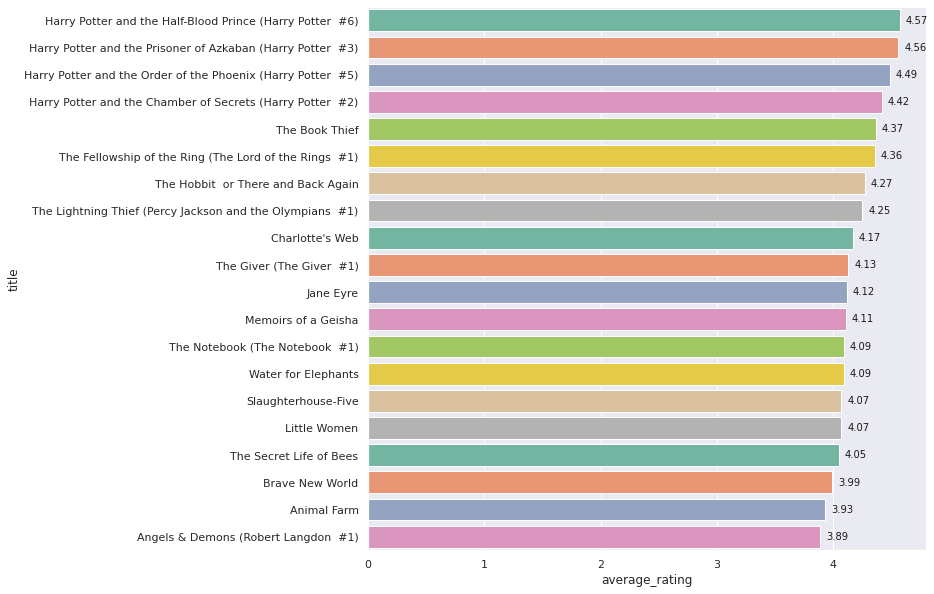

In [166]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="average_rating", y="title", data=top_books, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

In [167]:
top_vote = df.sort_values(by='ratings_count', ascending=False).head(20)
top_vote.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10336,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,9/6/2006,Little Brown and Company
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
1462,5107,The Catcher in the Rye,J.D. Salinger,3.80,0316769177,9780316769174,eng,277,2457092,43499,1/30/2001,Back Bay Books


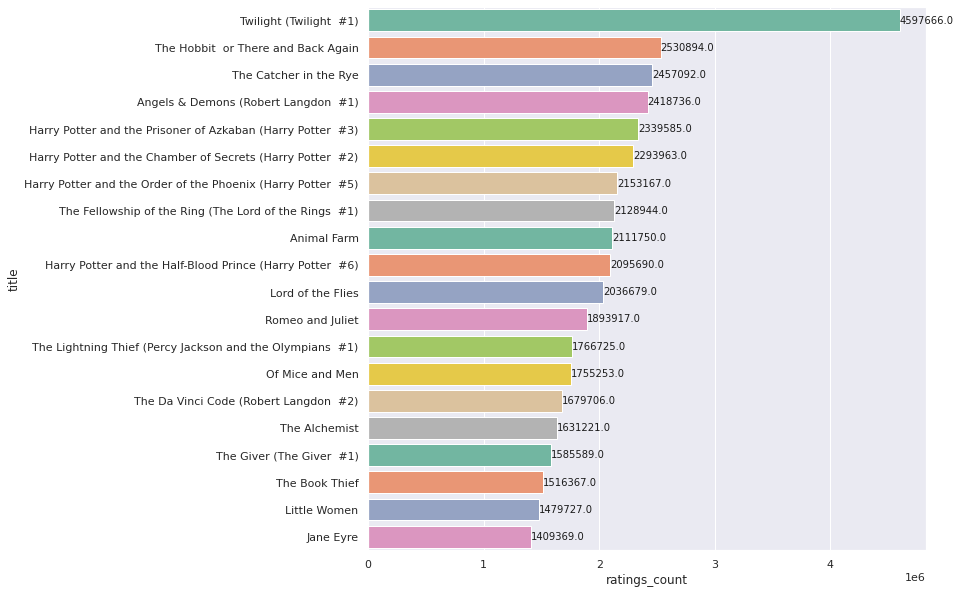

In [168]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="ratings_count", y="title", data=top_vote, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

In [169]:
list(set(top_books['title'].values) - set(top_vote['title'].values))

["Charlotte's Web",
 'Brave New World',
 'Slaughterhouse-Five',
 'Memoirs of a Geisha',
 'Water for Elephants',
 'The Secret Life of Bees',
 'The Notebook (The Notebook  #1)']

In [170]:
list(set(top_vote['title'].values) - set(top_books['title'].values))

['Of Mice and Men',
 'Romeo and Juliet',
 'The Catcher in the Rye',
 'Lord of the Flies',
 'Twilight (Twilight  #1)',
 'The Alchemist',
 'The Da Vinci Code (Robert Langdon  #2)']

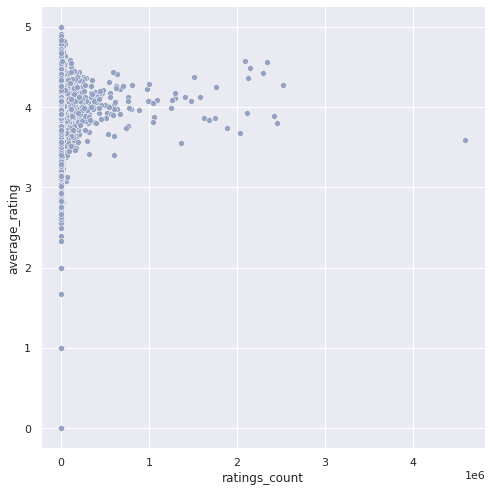

In [171]:
ax = sns.relplot(data=df, x="ratings_count", y="average_rating", color = '#95a3c3', sizes=(100, 200), height=7, marker='o')

In [172]:
new_df = df.copy()

In [173]:
def fun_only_author(text):
    arlen = text.split('/')
    return arlen[0]

In [174]:
new_df['only_author'] = new_df['authors'].apply(lambda x : fun_only_author(x))
new_df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,only_author
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,J.K. Rowling
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,J.K. Rowling
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,J.K. Rowling
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,J.K. Rowling
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,J.K. Rowling
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,William T. Vollmann
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,William T. Vollmann
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,William T. Vollmann
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco,William T. Vollmann


In [175]:
total_rating = new_df.drop_duplicates(subset=['only_author', 'title'], keep='first')
total_rating = total_rating.groupby(by=['only_author']).agg({'average_rating': ['sum']})
total_rating.columns = ['total_rating']
total_rating.reset_index(inplace=True)
total_rating = total_rating.sort_values(by=['total_rating'], ascending=False)
total_rating.head(3)

,only_author,total_rating
3753,Stephen King,250.79
3006,P.G. Wodehouse,187.31
4161,William Shakespeare,178.45


In [176]:
total_book = new_df.groupby(by=['only_author']).agg({'title': ['nunique']})
total_book.columns = ['total_book']
total_book.reset_index(inplace=True)
total_book = total_book.sort_values(by=['total_book'], ascending=False)
total_book.head(3)

,only_author,total_book
3753,Stephen King,63
4161,William Shakespeare,45
3006,P.G. Wodehouse,45


In [177]:
avg_author = pd.merge(total_book, total_rating, on='only_author', how='outer')
avg_author['average_rating'] = round(avg_author['total_rating'] / avg_author['total_book'], 2)
avg_author = avg_author[avg_author['total_book'] > 26]
avg_author = avg_author.sort_values(by=['average_rating'], ascending=False)
avg_author.head(3)

,only_author,total_book,total_rating,average_rating
4,J.R.R. Tolkien,41,172.22,4.20
7,Rumiko Takahashi,39,163.28,4.19
11,C.S. Lewis,32,134.02,4.19


In [178]:
total_vote = new_df.drop_duplicates(subset=['only_author', 'title'], keep='first')
total_vote.reset_index(inplace=True)
total_vote = total_vote[['only_author', 'title', 'average_rating', 'ratings_count']]
total_vote.head(3)

,only_author,title,average_rating,ratings_count
0,J.K. Rowling,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690
1,J.K. Rowling,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167
2,J.K. Rowling,Harry Potter and the Chamber of Secrets (Harry...,4.42,6333


In [179]:
C = total_vote.average_rating.mean()
C

3.933244410325305

In [180]:
m = total_vote.ratings_count.quantile(0.9)
m

24967.0

In [181]:
total_vote = total_vote[total_vote['ratings_count'] >= m]
total_vote.head(3)

,only_author,title,average_rating,ratings_count
0,J.K. Rowling,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690
1,J.K. Rowling,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167
3,J.K. Rowling,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2339585


In [182]:
def weighted_rating(x, m=m, C=C):
    v = x['ratings_count']
    R = x['average_rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [183]:
total_vote['score'] = total_vote.apply(weighted_rating, axis=1)

In [184]:
total_vote = total_vote.sort_values(by='score', ascending=False).head(20)
total_vote.head(3)

,only_author,title,average_rating,ratings_count,score
0,J.K. Rowling,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690,4.562503
3,J.K. Rowling,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2339585,4.553382
1,J.K. Rowling,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167,4.483618


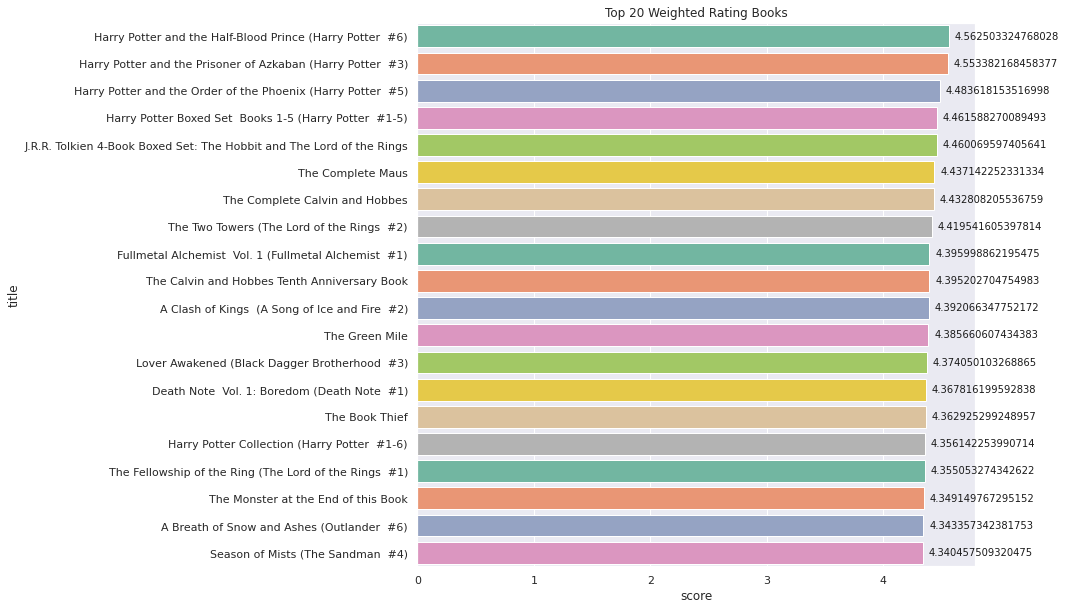

In [211]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="score", y="title", data=total_vote, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.title("Top 20 Weighted Rating Books")
plt.show()

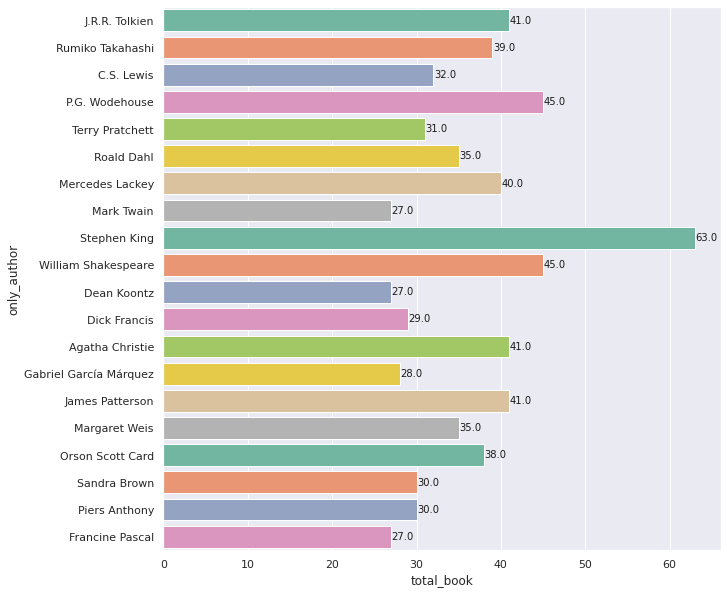

In [186]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="total_book", y="only_author", data=avg_author, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

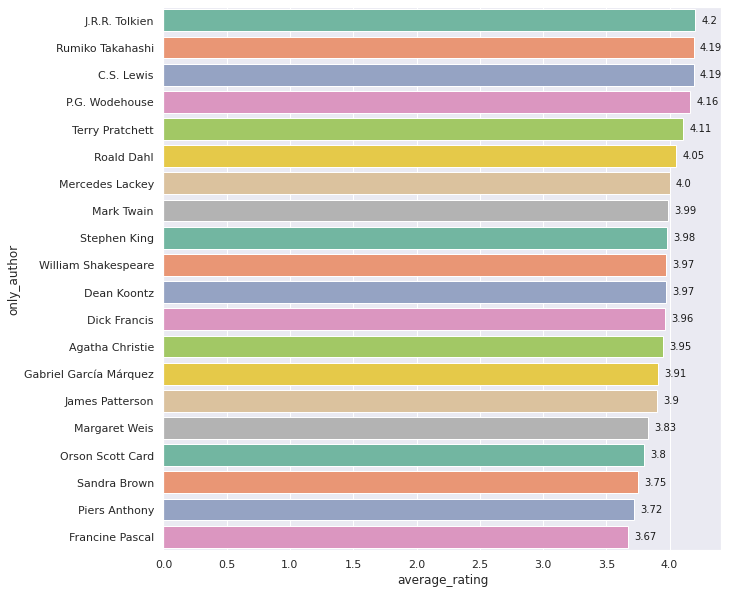

In [187]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="average_rating", y="only_author", data=avg_author, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()


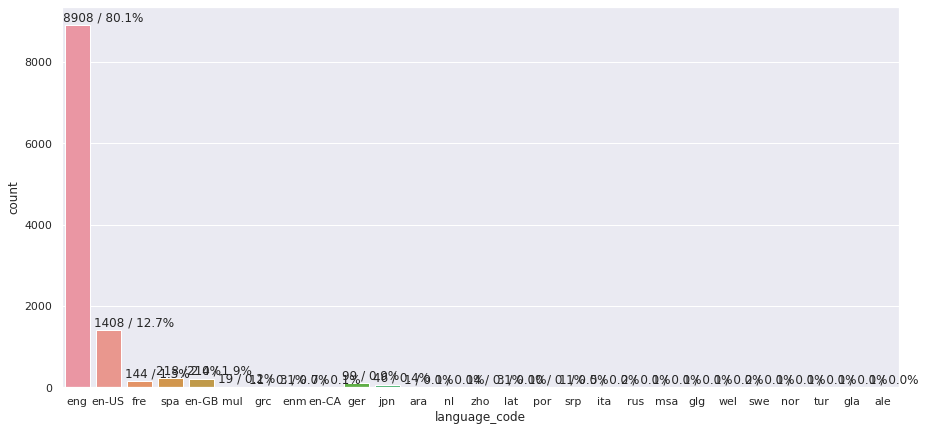

In [230]:
total = float(len(df))
plt.figure(figsize=(15, 7))
ax = sns.countplot(x=df.language_code, data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    # ax.text(p.get_x()-0.05, p.get_height()+400,percentage)
    ax.annotate(str(p.get_height())+ f" / {percentage}", (p.get_x()-0.05, p.get_height()+100))

In [189]:
top_pages = df.sort_values(by='  num_pages', ascending=False).head(20)

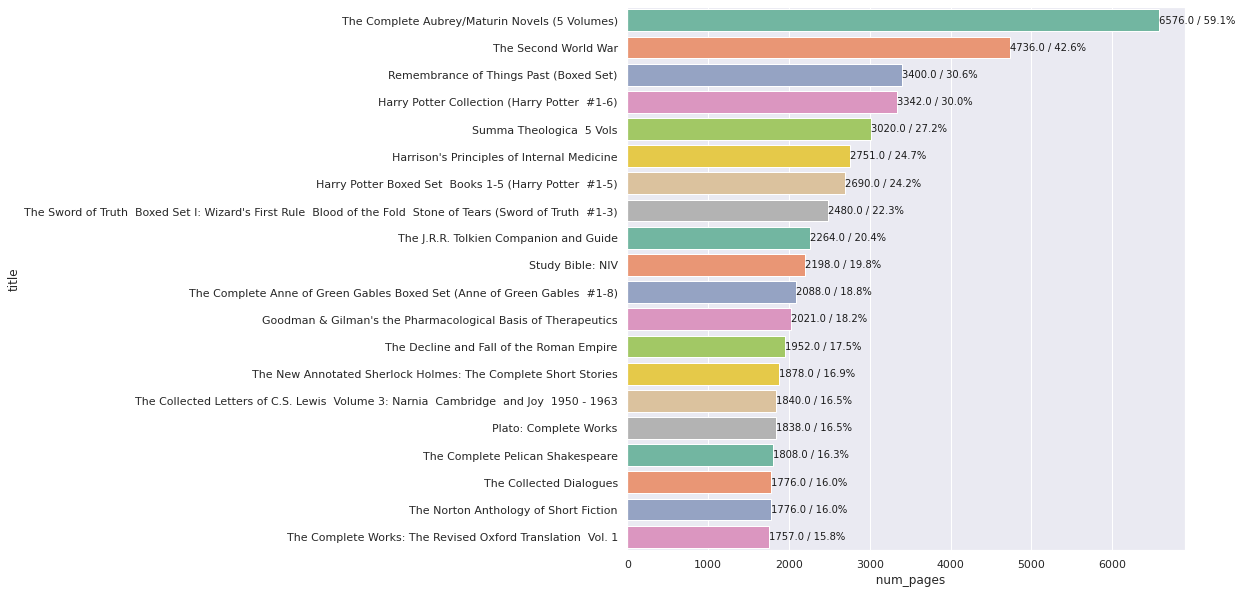

In [229]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="  num_pages", y="title", data=top_pages, palette=color)

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_width()/total)

    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()) + f" / {percentage}", fontsize = 10, color = 'k')
plt.show()

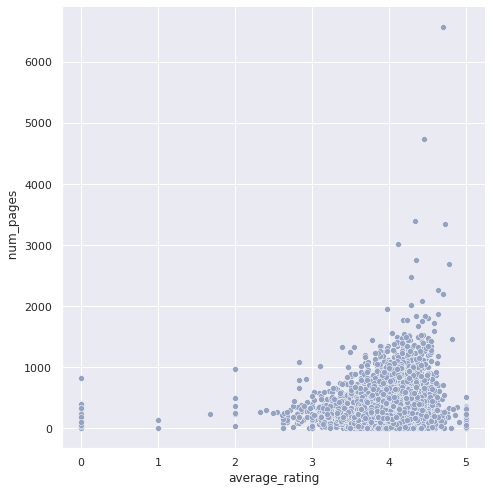

In [191]:
ax = sns.relplot(data=df, x="average_rating", y="  num_pages", color = '#95a3c3', sizes=(100, 200), height=7, marker='o')

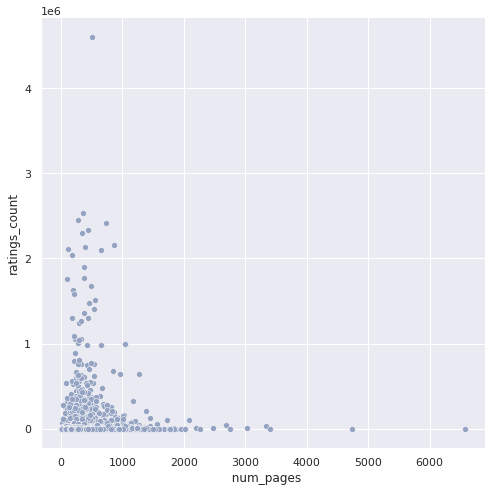

In [192]:
ax = sns.relplot(data=df, x="  num_pages", y="ratings_count", color = '#95a3c3', sizes=(100, 200), height=7, marker='o')

In [264]:
title_value = df.title.unique()
title_value

array(['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
       'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
       'Harry Potter and the Chamber of Secrets (Harry Potter  #2)', ...,
       'The Ice-Shirt (Seven Dreams #1)', 'Poor People',
       'Las aventuras de Tom Sawyer'], dtype=object)

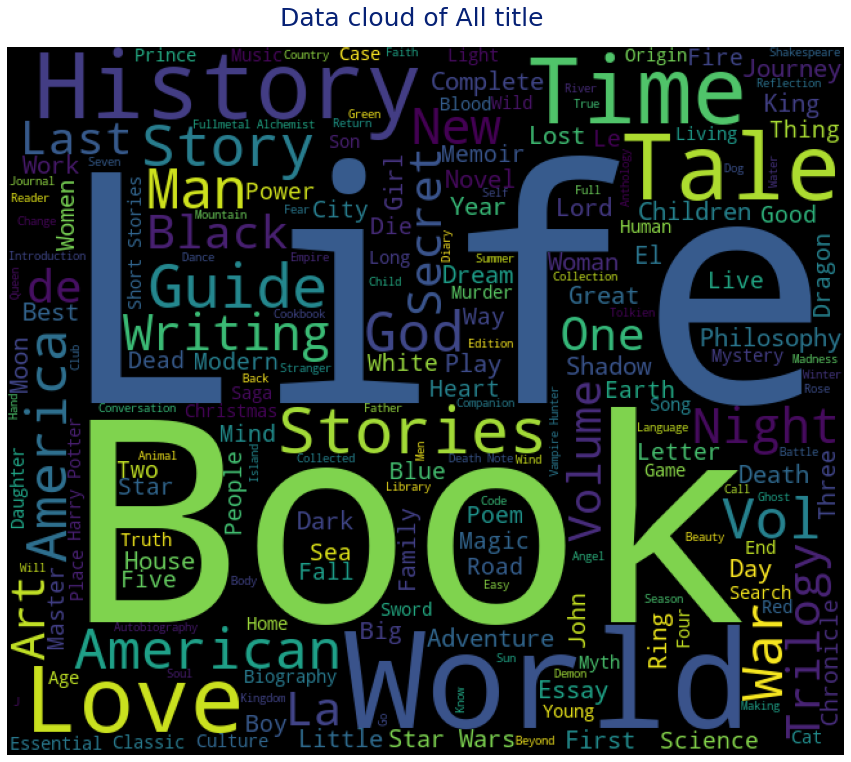

In [233]:
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='#000',
                          width=650,
                          height=550,
                          stopwords=STOPWORDS,
                         ).generate(" ".join(title_value))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.figtext(.5,.85,'Data cloud of All title', color='#062175', fontsize=25, ha='center')
plt.show()

In [234]:
len(new_df.only_author.unique())

4215

In [235]:
new_df.loc[ (new_df['average_rating'] >= 0) & (new_df['average_rating'] <= 1), 'rating_between'] = "between_0_to_1"
new_df.loc[ (new_df['average_rating'] > 1) & (new_df['average_rating'] <= 2), 'rating_between'] = "between_1_to_2"
new_df.loc[ (new_df['average_rating'] > 2) & (new_df['average_rating'] <= 3), 'rating_between'] = "between_2_to_3"
new_df.loc[ (new_df['average_rating'] > 3) & (new_df['average_rating'] <= 4), 'rating_between'] = "between_3_to_4"
new_df.loc[ (new_df['average_rating'] > 4) & (new_df['average_rating'] <= 5), 'rating_between'] = "between_4_to_5"

In [197]:
new_df.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,only_author,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,J.K. Rowling,between_4_to_5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,J.K. Rowling,between_4_to_5
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,J.K. Rowling,between_4_to_5


In [238]:
trial = new_df[['average_rating', 'ratings_count','text_reviews_count']]
print(trial.head(3))
data_model = np.asarray([np.asarray(trial['average_rating']), np.asarray(trial['ratings_count']) , np.asanyarray(trial['text_reviews_count'])]).T
data_model

   average_rating  ratings_count  text_reviews_count
0            4.57        2095690               27591
1            4.49        2153167               29221
2            4.42           6333                 244


array([[4.570000e+00, 2.095690e+06, 2.759100e+04],
       [4.490000e+00, 2.153167e+06, 2.922100e+04],
       [4.420000e+00, 6.333000e+03, 2.440000e+02],
       ...,
       [3.960000e+00, 8.200000e+02, 9.500000e+01],
       [3.720000e+00, 7.690000e+02, 1.390000e+02],
       [3.910000e+00, 1.130000e+02, 1.200000e+01]])

In [239]:
score = []
x = data_model

for cluster in range(1,41):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=40)
    kmeans.fit(x)
    score.append(kmeans.inertia_)

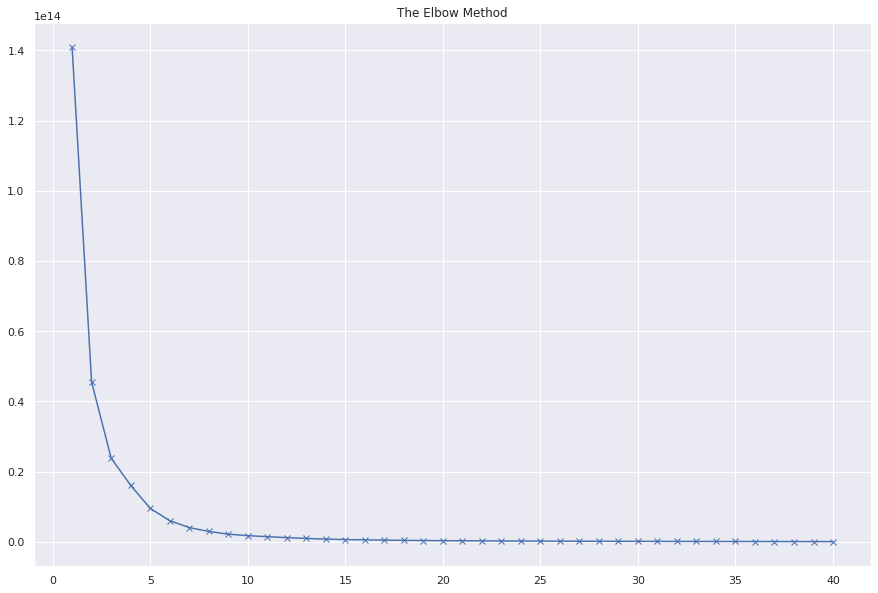

In [251]:
plt.figure(figsize=(15, 10))
plt.plot(range(1,41), score, 'bx-')
plt.title('The Elbow Method')
# plt.xlabel('no of clusters')
# plt.ylabel('wcss')
plt.show()

In [241]:
rating_between_df = new_df['rating_between'].str.get_dummies(sep=",")
rating_between_df.head()

,between_0_to_1,between_1_to_2,between_2_to_3,between_3_to_4,between_4_to_5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [242]:
lang_df = new_df['language_code'].str.get_dummies(sep=",")
lang_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [243]:
engine_features = pd.concat([rating_between_df, lang_df, new_df['average_rating'], new_df['ratings_count'],new_df['text_reviews_count']], axis=1)
engine_features.head()

,between_0_to_1,between_1_to_2,between_2_to_3,between_3_to_4,between_4_to_5,ale,ara,en-CA,en-GB,en-US,...,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count,text_reviews_count
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4.57,2095690,27591
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4.49,2153167,29221
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4.42,6333,244
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4.56,2339585,36325
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4.78,41428,164


In [244]:
min_max_scaler = MinMaxScaler()
engine_features = min_max_scaler.fit_transform(engine_features)

In [245]:
engine_model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')

In [246]:
engine_model.fit(engine_features)

NearestNeighbors(algorithm='ball_tree', n_neighbors=6)

In [247]:
dist, idlist = engine_model.kneighbors(engine_features)

In [344]:
def book_recommendation_engine(book_name,similar=False):
    rdf = pd.DataFrame(columns=new_df.columns)
    book_id = new_df[new_df['title'].str.contains(book_name, regex=False)].index
    # book_id = new_df[new_df['title'] == book_name].index
    book_ids = book_id
    if similar:
      book_ids = book_id
    else:
      book_ids = [book_id[0]]
    for book_id in book_ids:
      for newid in idlist[book_id]:
          rdf = rdf.append([new_df.loc[newid]])
    return rdf

In [346]:
book_list_name = book_recommendation_engine('The Hobbit',similar=True)
print(f"Got {len(book_list_name)} recommendation/s")
print("\n".join(book_list_name.title.unique()))

Got 42 recommendation/s
J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings
Season of Mists (The Sandman  #4)
Fullmetal Alchemist  Vol. 1 (Fullmetal Alchemist  #1)
The Calvin and Hobbes Tenth Anniversary Book
Collected Fictions
Harry Potter and the Goblet of Fire (Harry Potter  #4)
The Hobbit  or There and Back Again
Harry Potter and the Chamber of Secrets (Harry Potter  #2)
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)
Harry Potter and the Order of the Phoenix (Harry Potter  #5)
Harry Potter and the Half-Blood Prince (Harry Potter  #6)
The Fellowship of the Ring (The Lord of the Rings  #1)
Poems From The Hobbit
Huxley and God: Essays on Religious Experience
Maison Ikkoku  Volume 14 (Maison Ikkoku  #14)
The Writer of Modern Life: Essays on Charles Baudelaire
Giraffes Can't Dance
Anne of the Island and Tales of Avonlea
The Hobbit: Or There and Back Again
George Washington and Benedict Arnold: A Tale of Two Patriots
The Possessed
The Hobbit  or  There and 